In [1]:
import numpy as np
import pandas as pd
DDoS = pd.read_csv('/content/dataset_sdn.csv')
DDoS.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [2]:
DDoS.Protocol.unique()
DDoS['Protocol'] = DDoS['Protocol'].replace('TCP', '0')
DDoS['Protocol'] = DDoS['Protocol'].replace('UDP', '1')
DDoS['Protocol'] = DDoS['Protocol'].replace('ICMP', '2')
DDoS.Protocol.unique()

array(['1', '0', '2'], dtype=object)

In [3]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())

In [4]:
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [5]:
X= DDoS[['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]
y=DDoS["label"]

In [7]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [8]:
# Compute DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [9]:
# Number of clusters in labels, ignoring noise if present.
from sklearn import metrics
labels_true=y
n_clusters_ = 2
n_noise_ = list(labels).count(-1)
 
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
  % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
  % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
  % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 69825
Homogeneity: 0.146
Completeness: 0.070
V-measure: 0.094
Adjusted Rand Index: -0.021
Adjusted Mutual Information: 0.094
Silhouette Coefficient: -0.222


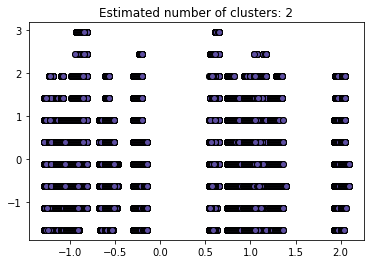

In [10]:
# Plot result
import matplotlib.pyplot as plt
 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
      for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
 if k == 1:
    # Black used for noise.
    col = [0, 1]
 
class_member_mask = (labels == k)
 
xy = X[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=14)
 
xy = X[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)
 
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()